In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


In [ ]:
!pip install gradio

     |████████████████████████████████| 3.4 MB 4.3 MB/s 
     |████████████████████████████████| 206 kB 49.8 MB/s 
     |████████████████████████████████| 1.9 MB 31.1 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 961 kB 55.8 MB/s 
     |████████████████████████████████| 3.2 MB 32.7 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=98bc2f1f191bde0e57d59d25acc7169d10dfbf6947cb58a2b70f3c7797be505c
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=3247df3f042b88435e746b439b6a276654ffd1efafd6d5957127c8fd42e0cdc9
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [ ]:
import gradio as gr 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
infected_cell = os.listdir('/content/drive/MyDrive/cell_images/Infected') 
uninfected_cell = os.listdir('/content/drive/MyDrive/cell_images/Uninfected ')
testing_cell = os.listdir('/content/drive/MyDrive/test/')


print("Infected:",len(infected_cell))
print("Uninfected:",len(uninfected_cell))
print("test:",len(testing_cell) )

FileNotFoundError: ignored

In [ ]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)



In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory='/content/drive/MyDrive/cell_images/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory='/content/drive/MyDrive/cell_images/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
class_names = train_ds.class_names
print(class_names)

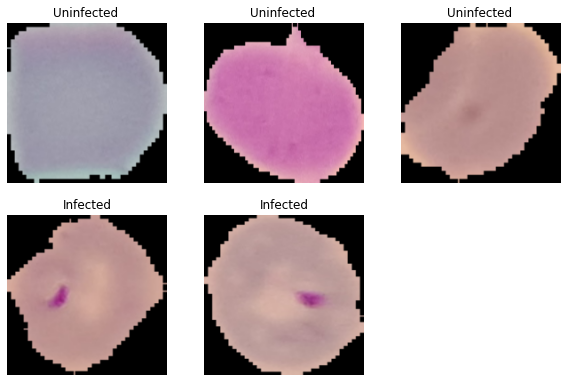

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(5):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
test_ds = test_gen.flow_from_directory("./Tr-Te-Val/test",
                                       target_size=(224,224),
                                        seed = 123,
                                        batch_size=32,
                                      shuffle=False
                                      )

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 180, 180, 3)
(32,)


In [ ]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes),
  layers.Dense(5,activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


191/191 [==============================] - 1055s 6s/step - loss: 0.6983 - accuracy: 0.6146 - val_loss: 0.5420 - val_accuracy: 0.7536
Epoch 2/10
191/191 [==============================] - 183s 955ms/step - loss: 0.4367 - accuracy: 0.7979 - val_loss: 0.3600 - val_accuracy: 0.8388
Epoch 3/10
191/191 [==============================] - 182s 953ms/step - loss: 0.2675 - accuracy: 0.8937 - val_loss: 0.2131 - val_accuracy: 0.9181
Epoch 4/10
191/191 [==============================] - 182s 952ms/step - loss: 0.1900 - accuracy: 0.9283 - val_loss: 0.2487 - val_accuracy: 0.8971
Epoch 5/10
191/191 [==============================] - 182s 953ms/step - loss: 0.1628 - accuracy: 0.9386 - val_loss: 0.2531 - val_accuracy: 0.9063
Epoch 6/10
191/191 [==============================] - 182s 954ms/step - loss: 0.1277 - accuracy: 0.9522 - val_loss: 0.2572 - val_accuracy: 0.8978
Epoch 7/10
191/191 [==============================] - 183s 953ms/step - loss: 0.0923 - accuracy: 0.9649 - val_loss: 0.2454 - val_accuracy

In [ ]:
tf.keras.models.save_model(model,'/content/my_model4.hdf5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)       

In [ ]:
labels_test = []
for i in range(0, len(val_ds)):
    labels_test.extend(np.array(val_ds[i][1]))
    
labels_test = np.array(labels_test, dtype = 'int64')


labels_predict = model.predict(val_ds)

TypeError: ignored

In [ ]:
def predict_image(img):
  img_3d = img.reshape(-1,180,180,3)
  img_resize = img_3d
  prediction = model.predict(img_resize)[0]
  return {class_names[i]: float(prediction[i]) for i in range(2)}


In [ ]:
model.evaluate(val_ds)

48/48 [==============================] - 26s 489ms/step - loss: 0.2191 - accuracy: 0.9463


[0.21908164024353027, 0.9462647438049316]

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label, capture_session=True).launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://35125.gradio.app
Interface loading below...
